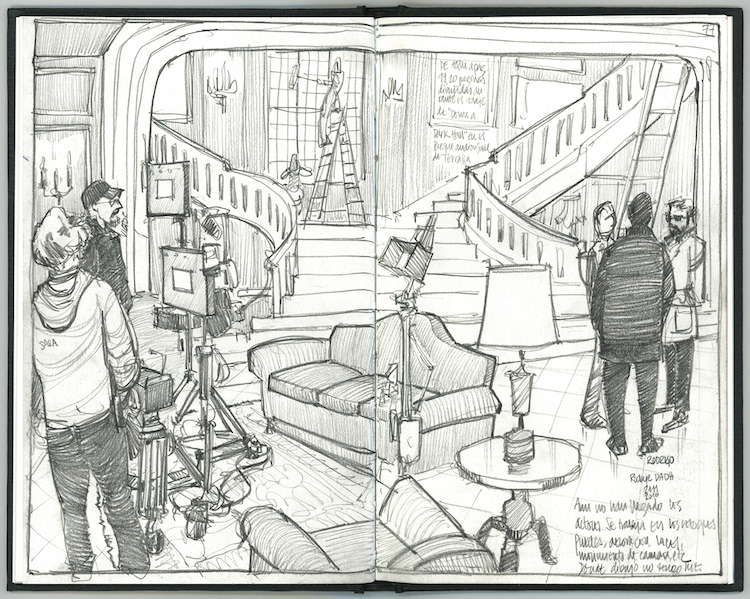

Name: **Ryan Posternak**<br>
Pace: Full-time Live NYC<br>
Project Review Date: 6/3/22<br>
Instructor Name: Joseph Mata

# Phase 1 Project: *Microsoft Movie Analysis*<br>

# Overview

This project uses exploratory data analysis (EDA) to generate insights for Microsoft Corp. in their undertaking of the creation of a new movie studio. By analyzing film runtimes, genres, ratings, number of ratings, and box office revenues from an IMDb dataset and a box office dataset, I provide three recommendations to Microsoft to maximize the likelihood of success in their creation of new content for their studio.

<br>

# Business Understanding

Microsoft has seen the success of other major tech companies with their creation of film and TV studios, and has decided to undertake their own venture. However, they have limited experience and knowledge on the minutiae of successful content creation. As such, I have been tasked with analyzing the most successful films to provide actioniable insights on what types of content are most likely to be succeed for Microsoft.

<br>

# Data Understanding

In this project I use a dataset from IMDb which contains information on film title, genre, runtime, year, average rating, and number of ratings. I also use a dataset of box office revenues, which contains information on film box office statistics, both foreign and domestic.

In [1]:
# Import relevant packages

import pandas as pd
import sqlite3
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Increse default resolution of matplotlib visualizations

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Initiate sqlite connection to IMDb dataset

conn = sqlite3.Connection("zippedData/im.db")

In [4]:
# Initialize connection to csv box office dataset

bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

### Display all tables from IMDb dataset

In [5]:
imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""

pd.read_sql(imdb_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


For this project, the only tables in the IMDb dataset I will be using are the "movie_basics" and "movie_ratings" tables

### movie_basics table

In [6]:
movie_basics = """
SELECT *
FROM movie_basics
"""

pd.read_sql(movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### movie_ratings table

In [7]:
movie_ratings = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### box office dataset

In [8]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Convert movie_basics and moving_ratings tables to pandas objects

In [9]:
movie_basics_df = pd.read_sql(movie_basics, conn)
movie_ratings_df = pd.read_sql(movie_ratings, conn)
print(f"movie_basics_df type: {type(movie_basics_df)}")
print(f"movie_ratings_df type: {type(movie_ratings_df)}")

movie_basics_df type: <class 'pandas.core.frame.DataFrame'>
movie_ratings_df type: <class 'pandas.core.frame.DataFrame'>


### Basic information on count of records, columns, missing values, and datatypes

In [10]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


<br>
As we can see, the IMDb movie_basics table has information on many more movies (~146k) than the IMDb movie_ratings table (~74k). Both of these have significantly more records than the box office table (~3.3k).<br>
<br>
We also see that the 'foreign_gross' series of bom_df is of Dtype object, while the 'domestic_gross' is of Dtype float as we would expect.

### Descriptive statistics on the movie_ratings dataframe

In [13]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Mean rating of 6.33<br>
Median rating of 6.50<br>
Standard deviation of ratings is 1.47<br>
Mean number of votes is 3523<br>
Median number of votes is 49<br>
Standard deviation of number of votes is 30294

<br>

# Data Preparation

## Data cleaning

### Drop unnecessary columns

In [14]:
# Drop original_title and start_year columns, which I will not be using, from movie_basics_df

movie_basics_df = movie_basics_df[['movie_id', 'primary_title', 'runtime_minutes', 'genres']]
movie_basics_df

,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,None


### Convert 'foreign_gross' to type float
As noted above, the 'foreign_gross' series of bom_df is of object datatype. I convert it to float so it is compatible with mathematical calculations and visualizations.

In [15]:
# Commas must be removed from foreign_gross before datatype can be changed to float

bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float')
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## Customizing and merging datasets

### Create bom_df_domestic dataframe and bom_df_foreign dataframe
The domestic dataframe will contain only domestic_gross values, and the bom_df_foreign dataframe will contain only foreign_gross values.<br>
<br>
I create two separate dataframes because we are missing 1,350 records in the foreign_gross series and 28 records in the domestic_gross series. Rather than drop all rows that are missing either (or both), I can preserve some data by separating the two.

In [16]:
bom_df_domestic = bom_df[['title', 'domestic_gross']]
bom_df_domestic

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [17]:
bom_df_foreign = bom_df[['title', 'foreign_gross']]
bom_df_foreign

,title,foreign_gross
0,Toy Story 3,652000000.0
1,Alice in Wonderland (2010),691300000.0
2,Harry Potter and the Deathly Hallows Part 1,664300000.0
3,Inception,535700000.0
4,Shrek Forever After,513900000.0
...,...,...
3382,The Quake,NaN
3383,Edward II (2018 re-release),NaN
3384,El Pacto,NaN
3385,The Swan,NaN


### Merge movie_basics_df and movie_ratings_df dataframes into imdb_df dataframe

In [18]:
# Now we can view 'averagerating' and 'numvotes' along with the rest of the IMDb data. We merge on 'movie_id'

imdb_df = movie_basics_df.merge(movie_ratings_df, on='movie_id', how='inner')
imdb_df

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,NaN,None,6.6,5


### Remove ratings from imdb_df with insufficient numvotes

In [19]:
# I remove all rows with numvotes < 30. The specific number of values is somewhat arbitrary.
original_imdb_df_rows = imdb_df.shape[0]

imdb_df = imdb_df.loc[imdb_df['numvotes'] >= 30]

original_imdb_df_rows - imdb_df.shape[0]

30116

We can see that 30,116 rows were removed. While this is a heavy amount of data to be lost (almost 41% of the dataset) it's likely that many of these datapoints would be providing more noise than signal.

### Remove missing values

Here I remove missing domestic_gross values. We can see that 28 records were removed.

In [20]:
bom_df_domestic = bom_df_domestic.dropna(subset=['domestic_gross'])
bom_df['domestic_gross'].shape[0] - bom_df_domestic['domestic_gross'].shape[0]

28

Here I remove missing foreign_gross values. We can see that 1,350 records were removed.

In [21]:
bom_df_foreign = bom_df_foreign.dropna(subset=['foreign_gross'])
bom_df['foreign_gross'].shape[0] - bom_df_foreign['foreign_gross'].shape[0]

1350

### Create datasets of average rating vs. gross revenues (domestic and foreign)

First, I rename the 'title' column names to 'primary_title' to match the IMDb dataset

In [22]:
bom_df_domestic = bom_df_domestic.rename(columns={'title': 'primary_title'})
bom_df_foreign = bom_df_foreign.rename(columns={'title': 'primary_title'})

Next, I merge the IMDb dataset with both domestic and foreign bom_df datasets on the 'primary_title' column

In [23]:
gross_vs_rating_domestic = imdb_df[['primary_title', 'averagerating']].merge\
                           (bom_df_domestic[['primary_title', 'domestic_gross']], on='primary_title', how='inner')

gross_vs_rating_domestic

,primary_title,averagerating,domestic_gross
0,Wazir,7.1,1100000.0
1,On the Road,6.1,744000.0
2,On the Road,5.7,744000.0
3,The Secret Life of Walter Mitty,7.3,58200000.0
4,A Walk Among the Tombstones,6.5,26300000.0
...,...,...,...
2838,The Chambermaid,7.1,300.0
2839,How Long Will I Love U,6.5,747000.0
2840,Helicopter Eela,5.4,72000.0
2841,Last Letter,6.4,181000.0


In [24]:
gross_vs_rating_foreign = imdb_df[['primary_title', 'averagerating']].merge\
                        (bom_df_foreign[['primary_title', 'foreign_gross']], on='primary_title', how='inner')

gross_vs_rating_foreign

,primary_title,averagerating,foreign_gross
0,On the Road,6.1,8000000.0
1,On the Road,5.7,8000000.0
2,The Secret Life of Walter Mitty,7.3,129900000.0
3,A Walk Among the Tombstones,6.5,26900000.0
4,Jurassic World,7.0,1019.4
...,...,...,...
1710,Detective Chinatown 2,6.1,542100000.0
1711,Hereditary,7.3,35300000.0
1712,Nobody's Fool,4.6,1800000.0
1713,How Long Will I Love U,6.5,82100000.0


### Create datasets of movie genres and box office revenues (domestic and foreign)

I merge the imdb_df dataset with the bom_df_domestic and then bom_df_foreign dataset on the newly named 'primary_title' column

In [25]:
genre_gross_domestic_df = imdb_df[['primary_title', 'genres']].merge\
                         (bom_df_domestic[['primary_title', 'domestic_gross']], on='primary_title', how='inner')

genre_gross_foreign_df = imdb_df[['primary_title', 'genres']].merge\
                         (bom_df_foreign[['primary_title', 'foreign_gross']], on='primary_title', how='inner')

In [26]:
genre_gross_domestic_df

,primary_title,genres,domestic_gross
0,Wazir,"Action,Crime,Drama",1100000.0
1,On the Road,"Adventure,Drama,Romance",744000.0
2,On the Road,Drama,744000.0
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",58200000.0
4,A Walk Among the Tombstones,"Action,Crime,Drama",26300000.0
...,...,...,...
2838,The Chambermaid,Drama,300.0
2839,How Long Will I Love U,Romance,747000.0
2840,Helicopter Eela,Drama,72000.0
2841,Last Letter,"Drama,Romance",181000.0


In [27]:
genre_gross_foreign_df

,primary_title,genres,foreign_gross
0,On the Road,"Adventure,Drama,Romance",8000000.0
1,On the Road,Drama,8000000.0
2,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",129900000.0
3,A Walk Among the Tombstones,"Action,Crime,Drama",26900000.0
4,Jurassic World,"Action,Adventure,Sci-Fi",1019.4
...,...,...,...
1710,Detective Chinatown 2,"Action,Comedy,Mystery",542100000.0
1711,Hereditary,"Drama,Horror,Mystery",35300000.0
1712,Nobody's Fool,"Comedy,Drama,Romance",1800000.0
1713,How Long Will I Love U,Romance,82100000.0


<br>

# Data Analysis

### Box office revenues by genre

My first analysis examines the highest grossing movie genres, domestic and foreign.<br>

We can see that adventure and action stand out amongst the pack as the highest grossing film genres in both domestic and foreign markets. While we may be tempted to suggest that the film studios should prioritize these genres, we have to be cautious of the effect of outliers. Many of the highest grossing films of all time, such as Avatar, Avengers, and Spider-Man, tend to be adventure and/or action films, but this does not necessarily mean that the average adventure and/or action film will perform well.

Another insight we can obtain from this analysis is that domestic markets tend to prefer crime films (at 6th highest grossing) compared to foreign markets (where crime is 8th highest grossing). We also see that foreign markets tend to favor mystery films (at 5th highest grossing) compared to domestic markets (7th highest grossing).

One item to note is that for films with multiple genres, I count each genre towards its respective category. For example, if a film is classified as both romance and comedy, its revenues will be added to both the romance and comedy gross averages. This means that films with multiple genres are overweighted in my analysis.

First, I find the most common genres. Then, I plot the top 10 most common.

I drop genres below the top 10 because the number of datapoints falls off (all the way down to only one for the least common genre), so we risk having an inaccurate analysis due to insufficient data. It is admittedly somewhat of an arbitrary cutoff.

In [28]:
# Append each genre (many are groups of multiple genres) to genres_list
genres_list = []

for genre in list(imdb_df['genres'].values):
    if genre == None:
        continue
    genres_list.append(genre.split(','))

# Create a new genres_list_separated
genres_list_separated = []

for genre in genres_list:
    genres_list_separated.extend(genre)

# Count occurence of each genre
genres_count_dict = Counter(genres_list_separated)
    
# Sort by count of genre, descending
sorted_genres_dict = dict(sorted(genres_count_dict.items(), key=lambda item: item[1], reverse=True))
sorted_genres_dict

{'Drama': 20049,
 'Comedy': 12047,
 'Documentary': 7052,
 'Thriller': 5879,
 'Horror': 5191,
 'Action': 5076,
 'Romance': 4721,
 'Crime': 3396,
 'Adventure': 2639,
 'Mystery': 2134,
 'Family': 2124,
 'Biography': 2114,
 'Sci-Fi': 1547,
 'History': 1545,
 'Fantasy': 1437,
 'Animation': 1214,
 'Music': 1109,
 'Sport': 730,
 'War': 551,
 'Musical': 397,
 'News': 228,
 'Western': 168,
 'Reality-TV': 5,
 'Game-Show': 1,
 'Adult': 1}

In [29]:
# Create top 10 most common genres list

top_10_genres = []

for i, key in enumerate(sorted_genres_dict.keys()):
    top_10_genres.append(key)
    if i == 9:
        break

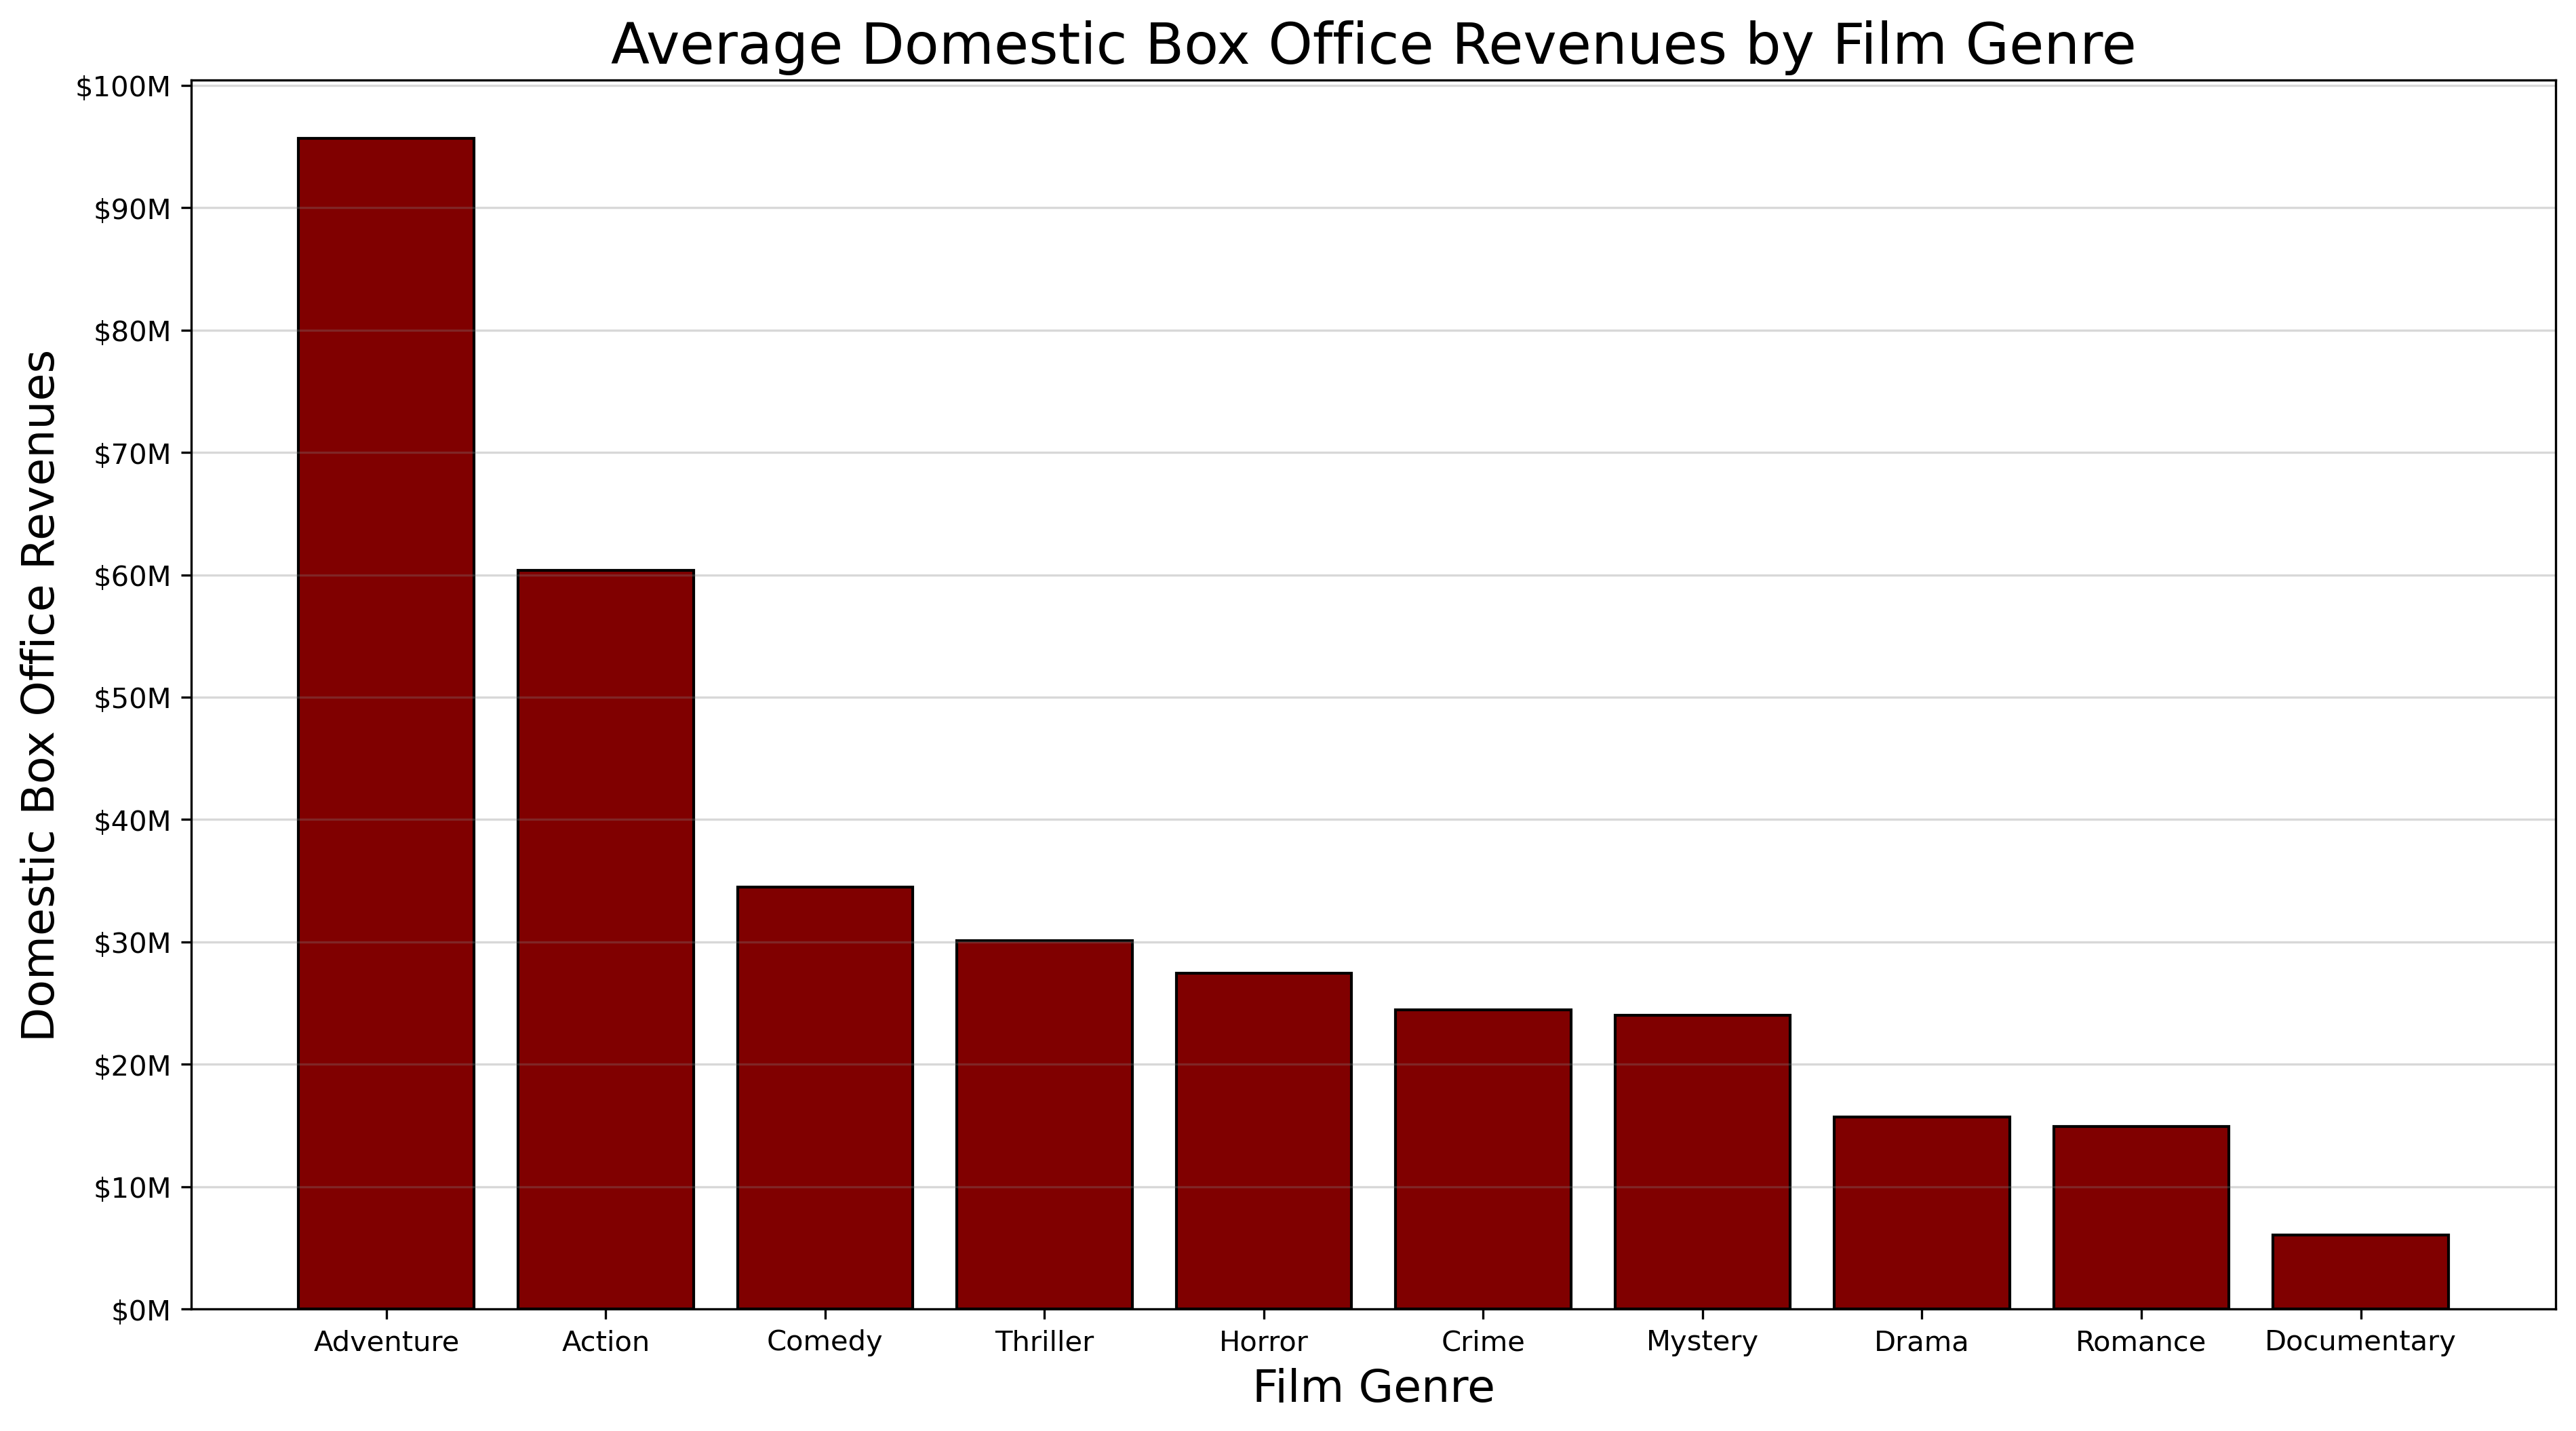

In [41]:
# Plot domestic box office success by genre

# Create dictionary of genre: average domestic revenue pairs, in integer format
genre_gross_domestic = {}

for genre in top_10_genres:
    genre_gross_domestic[genre] = int(genre_gross_domestic_df.loc[genre_gross_domestic_df['genres']\
                                  .str.contains(genre) == True]['domestic_gross'].mean())

    
# Sort by values, descending
genre_gross_domestic_sorted = dict(sorted(genre_gross_domestic.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(genre_gross_domestic_sorted.keys(), genre_gross_domestic_sorted.values(), color='maroon', edgecolor='black')
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Average Domestic Box Office Revenues by Film Genre', fontsize=20)
ax.set_xlabel('Film Genre', fontsize=16)
ax.set_ylabel('Domestic Box Office Revenues', fontsize=16)
ax.set_yticks([x for x in np.arange(0, 110000000, 10000000)])
ax.set_yticklabels(["$" + str(x) + "M" for x in np.arange(0, 110, 10)]);

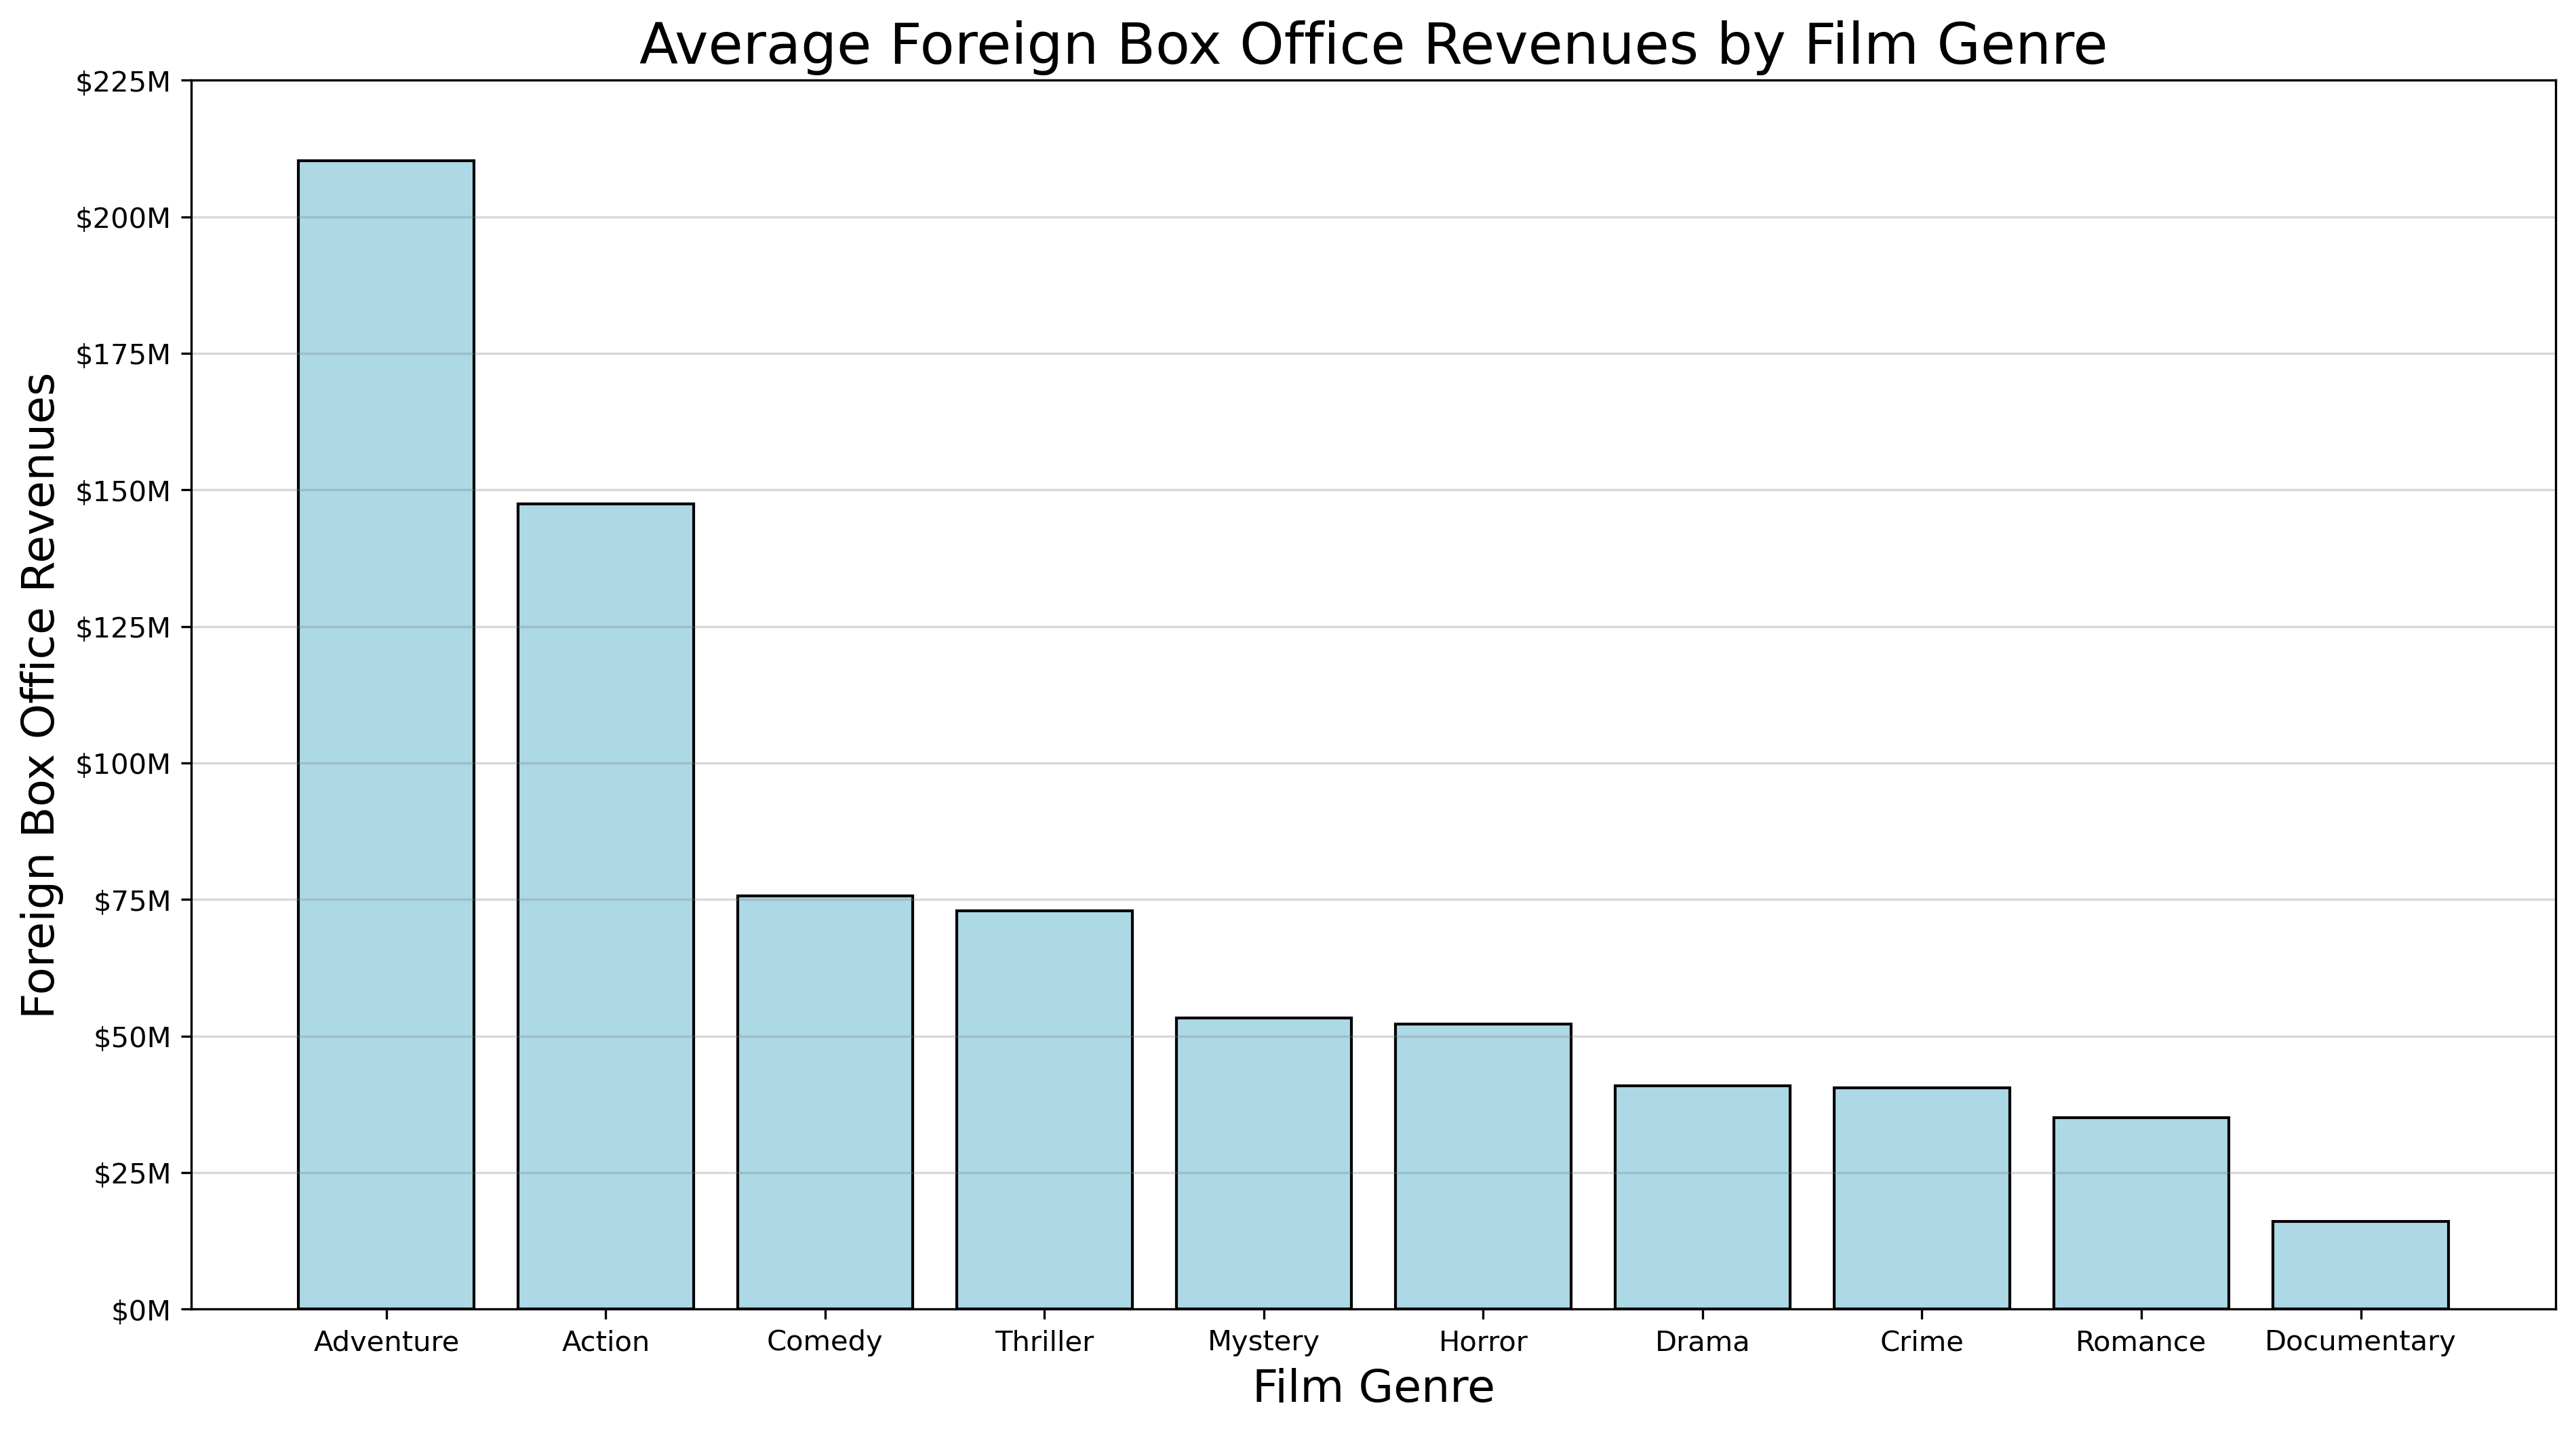

In [31]:
# Plot foreign box office success by genre

# Create dictionary of genre: average foreign revenue pairs, in integer format
genre_gross_foreign = {}

for genre in top_10_genres:
    genre_gross_foreign[genre] = int(genre_gross_foreign_df.loc[genre_gross_foreign_df['genres']\
                                 .str.contains(genre) == True]['foreign_gross'].mean())


# Sort by values, descending
genre_gross_foreign_sorted = dict(sorted(genre_gross_foreign.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(genre_gross_foreign_sorted.keys(), genre_gross_foreign_sorted.values(), color='lightblue', edgecolor='black')
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Average Foreign Box Office Revenues by Film Genre', fontsize=20)
ax.set_xlabel('Film Genre', fontsize=16)
ax.set_ylabel('Foreign Box Office Revenues', fontsize=16)
ax.set_yticks([x for x in np.arange(0, 250000000, 25000000)])
ax.set_yticklabels(["$" + str(x) + "M" for x in np.arange(0, 250, 25)]);

### Box office revenues by IMDb rating

My second analysis examines box office revenues, domestic and foreign, by IMDb rating.<br>
<br>
We can see that there is a positive correlation between average IMDb rating and domestic box office revenues. We can also see that there is an even stronger correlation between average IMDb rating and foreign box office revenues. We would expect the average IMDb rating for a film to correlate with its revenues, but we might not expect the correlation to be stronger in foreign markets than in domestic markets.

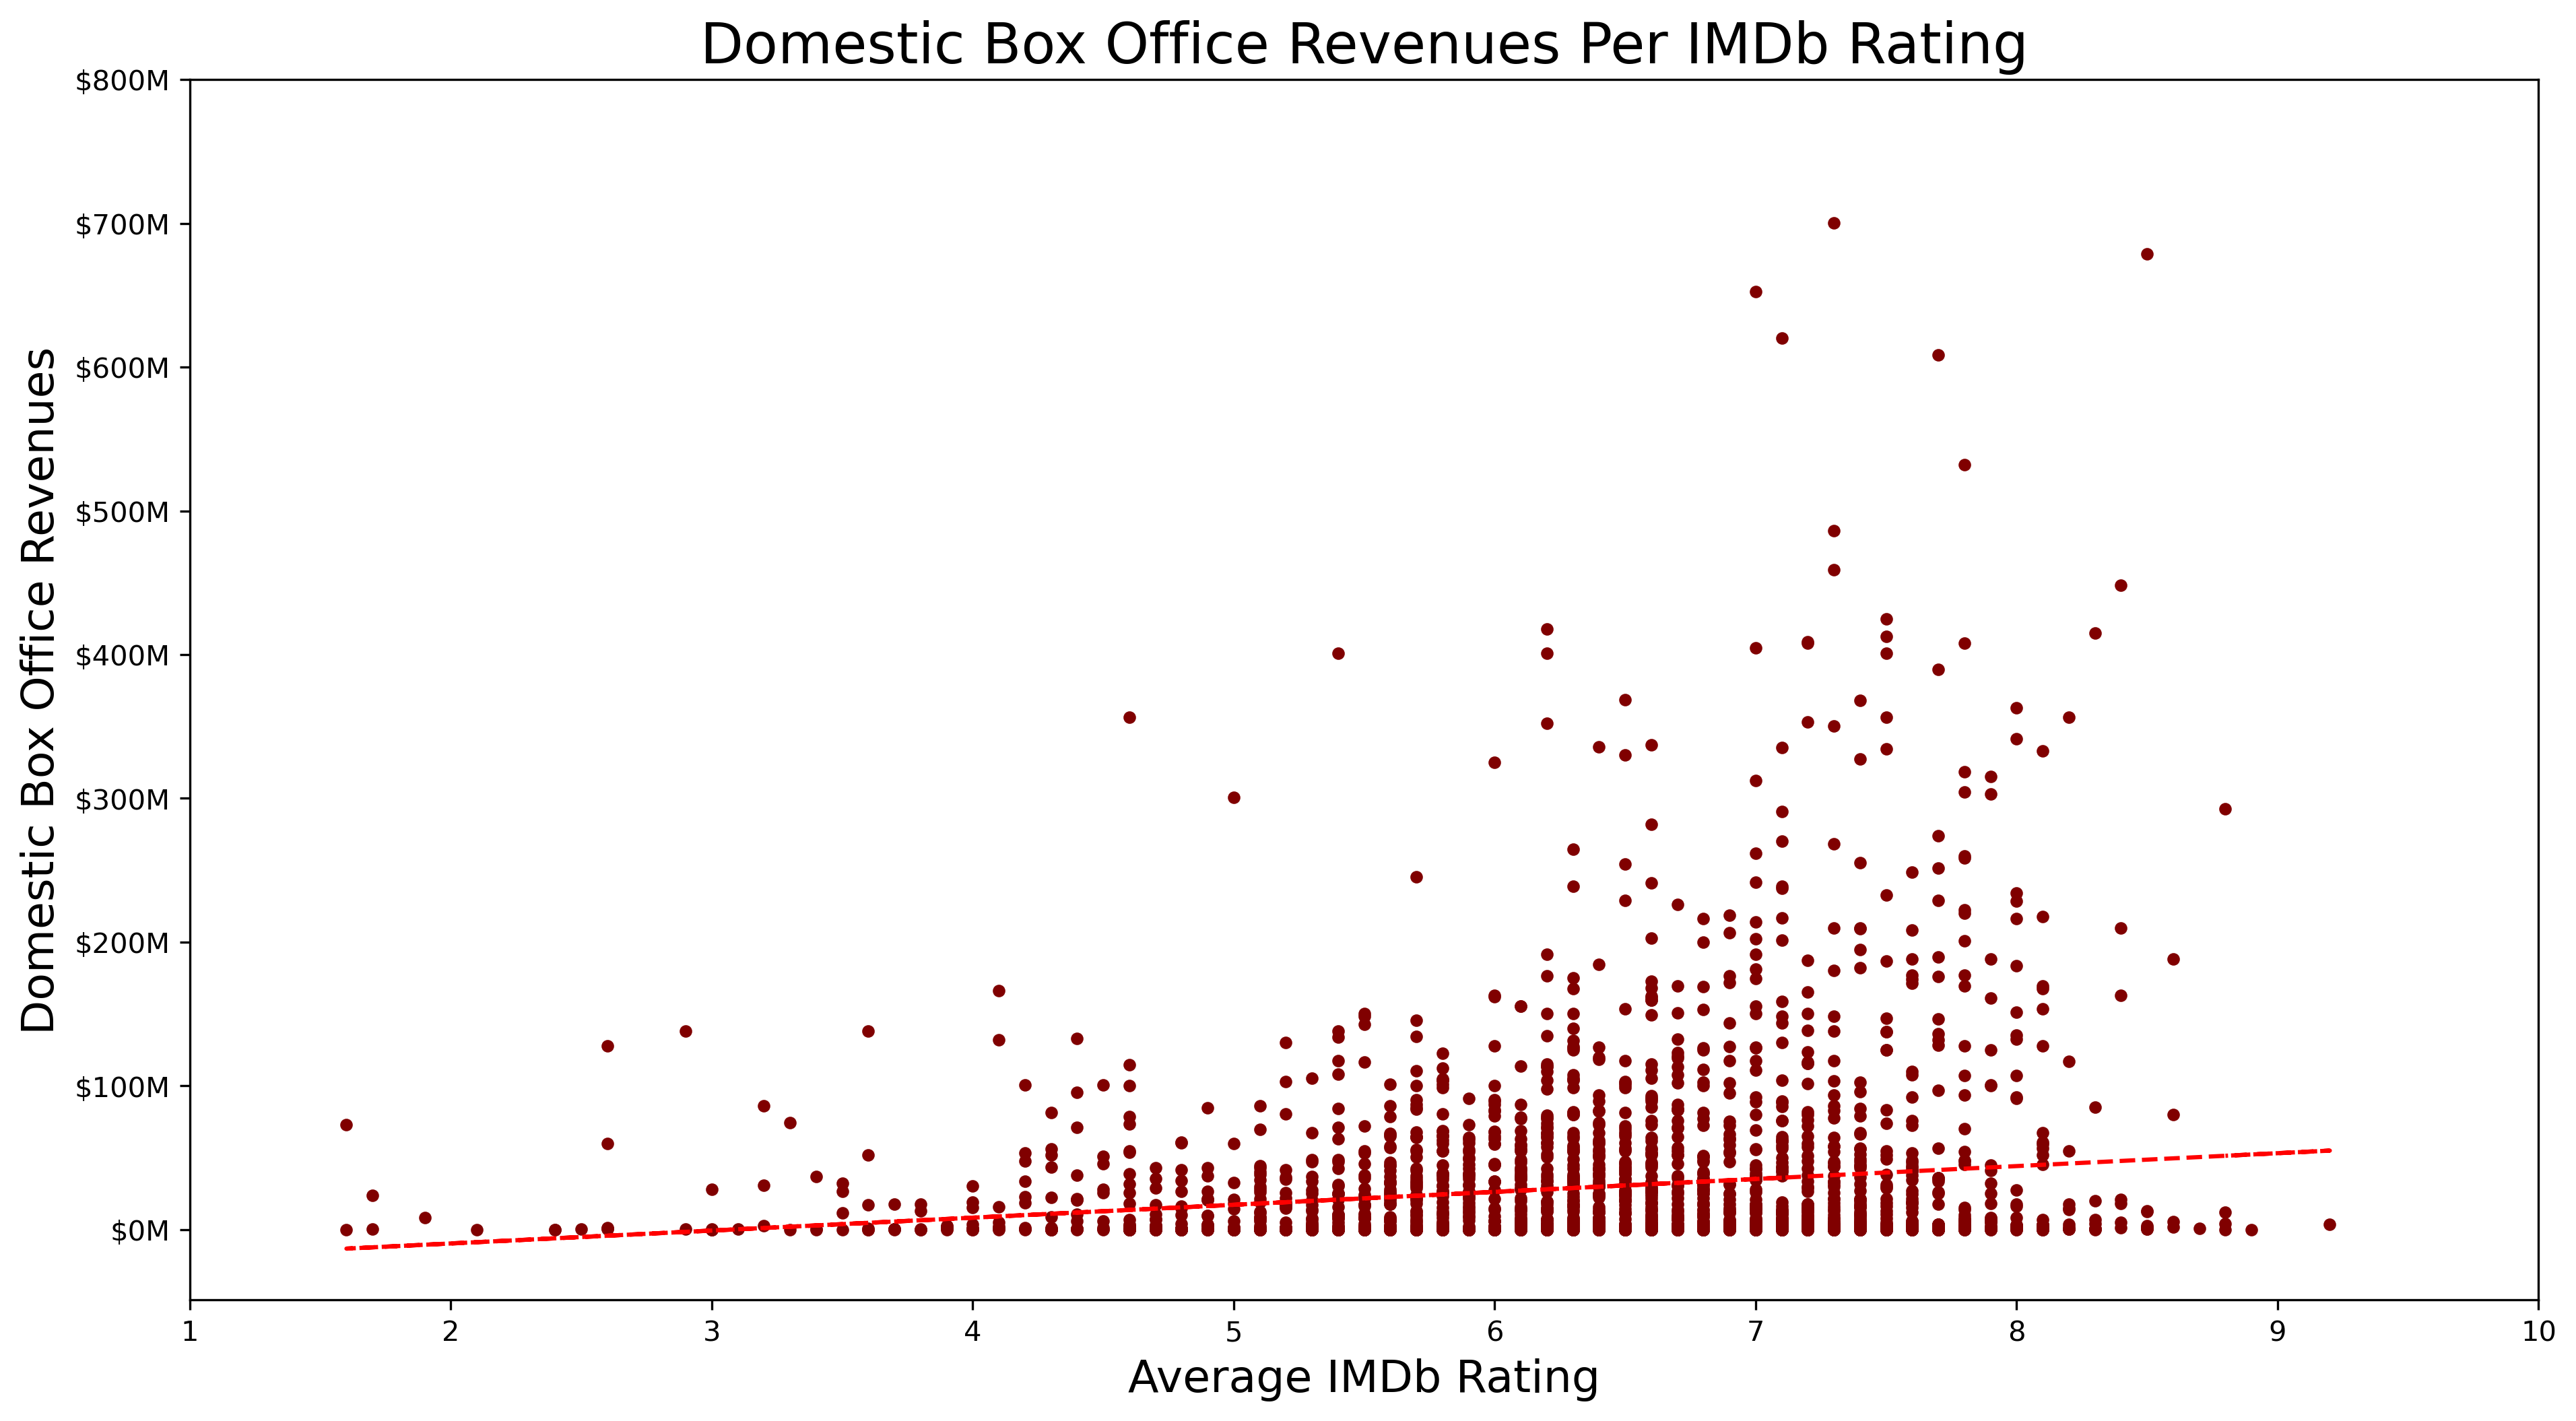

In [32]:
# Plot domestic box office revenues by average IMDb rating

fig, ax = plt.subplots(figsize=(15, 8))

x = gross_vs_rating_domestic['averagerating']
y = gross_vs_rating_domestic['domestic_gross']

ax.scatter(x, y, s=12, color='maroon')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

ax.set_xticks(list(range(1, 11)))
ax.set_yticks(list(range(0, 900000000, 100000000)))

ax.set_title('Domestic Box Office Revenues Per IMDb Rating', fontsize=20)
ax.set_xlabel('Average IMDb Rating', fontsize=16, color='black')
ax.set_ylabel('Domestic Box Office Revenues', fontsize=16, color='black')
ax.set_yticks([x for x in np.arange(0, 900000000, 100000000)])
ax.set_yticklabels(["$" + str(x) + "M" for x in np.arange(0, 900, 100)]);

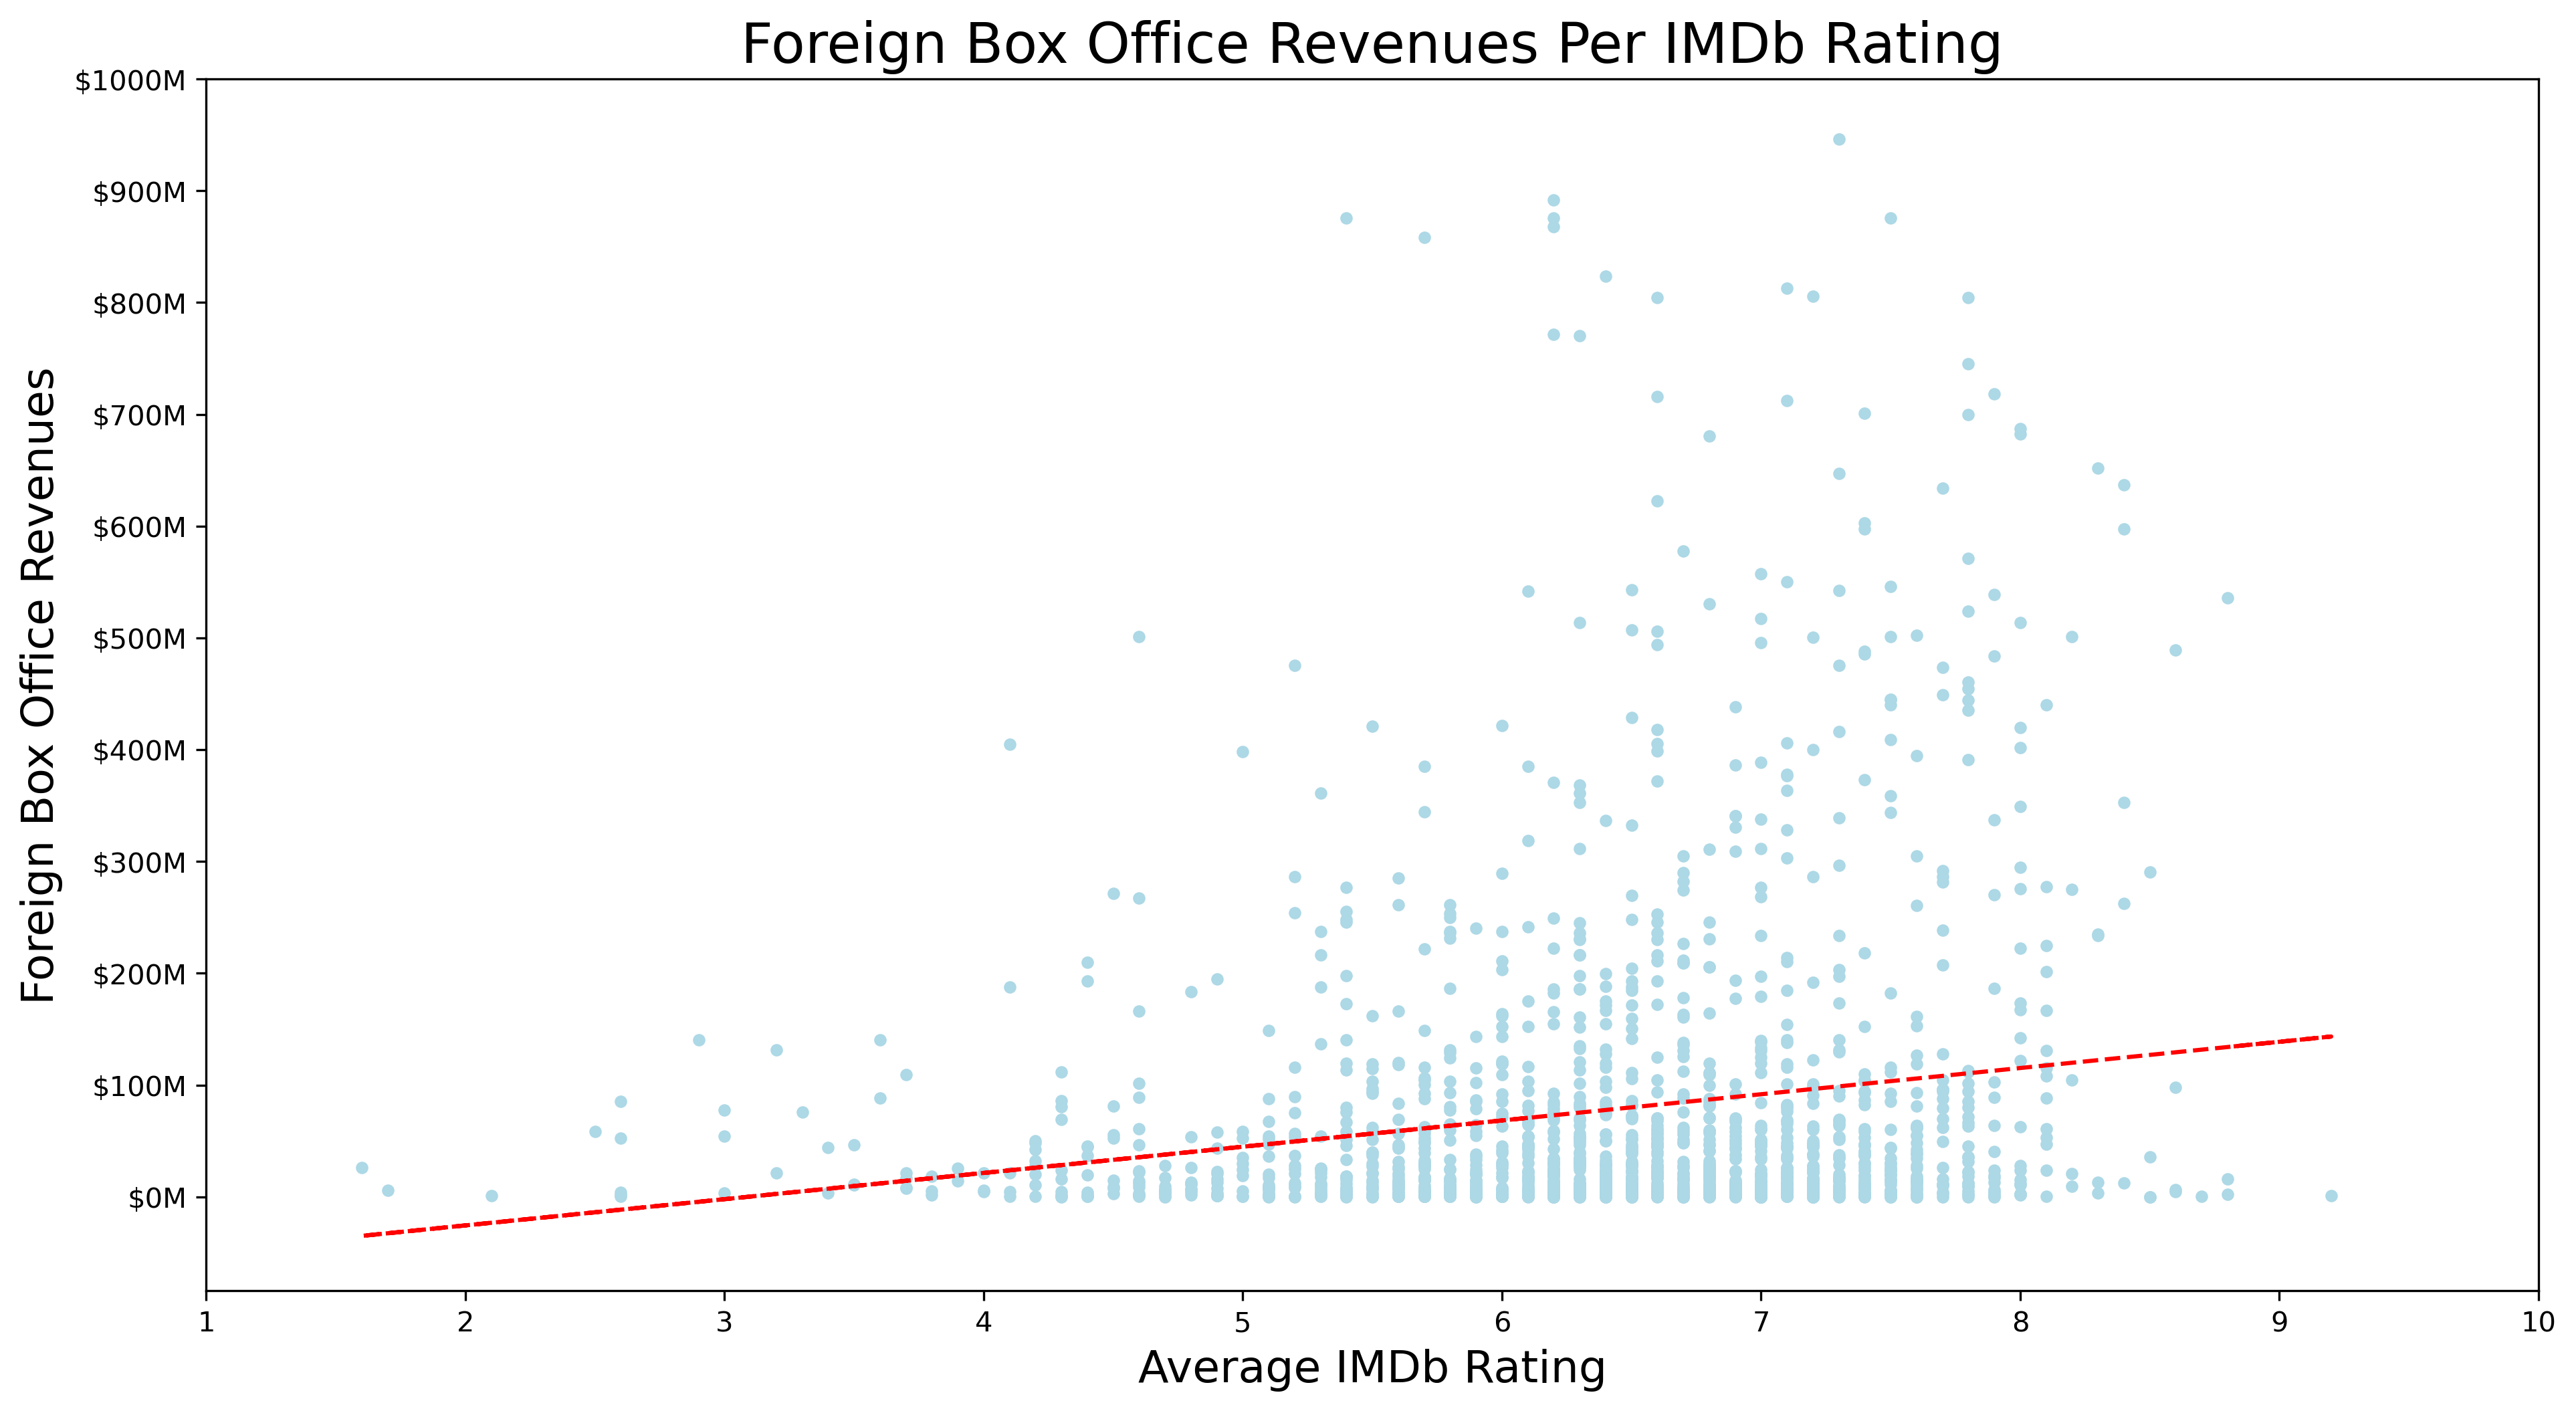

In [33]:
# Plot foreign box office revenues by average IMDb rating

fig, ax = plt.subplots(figsize=(15, 8))

x = gross_vs_rating_foreign['averagerating']
y = gross_vs_rating_foreign['foreign_gross']

ax.scatter(x, y, s=12, color='lightblue')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

ax.set_xticks(list(range(1, 11)))
ax.set_yticks(list(range(0, 1100000000, 100000000)))

ax.set_title('Foreign Box Office Revenues Per IMDb Rating', fontsize=20)
ax.set_xlabel('Average IMDb Rating', fontsize=16, color='black')
ax.set_ylabel('Foreign Box Office Revenues', fontsize=16, color='black')
ax.set_yticks([x for x in np.arange(0, 1100000000, 100000000)])
ax.set_yticklabels(["$" + str(x) + "M" for x in np.arange(0, 1100, 100)]);

### IMDb rating by Runtime

My third and final analysis examines average IMDb rating by runtime, segmented into 10 minute bins.

There is a clear upward trend in average IMDb rating until a film reaches 130 to 140 minutes, and then the rating drops off. However, surpassing 160 minutes, the average rating increases rapidly, surpassing the previous global maximum. Similar to our first analysis, we should be cautious with concluding that films should be longer than 160 minutes. While the effect of outliers will not be as strong here (ratings involve a 10 point scale, while revenues can reach into the billions), it's possible that film studios only tend to produce such extended films when they are especially confident of their success.

In [34]:
# Drop missing averagerating and numvotes values in imdb_df

imdb_df_runtime_cleaned = imdb_df.dropna(subset=['runtime_minutes', 'averagerating'])
imdb_df_runtime_cleaned

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...
73840,tt9904844,Ott Tänak: The Movie,125.0,Documentary,8.7,218
73841,tt9905412,Ottam,120.0,Drama,8.1,505
73842,tt9905462,Pengalila,111.0,Drama,8.4,600
73849,tt9911774,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365


In [35]:
# Segment runtimes and ratings series into 10 minute intervals

runtimes_series = []
ratings_series = []

for runtime in list(range(80, 180, 10)):
    runtimes_series.append(imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(runtime, runtime+10, 'left')]['runtime_minutes'])
    
for runtime in list(range(80, 180, 10)):
    ratings_series.append(imdb_df_runtime_cleaned.loc[imdb_df_runtime_cleaned['runtime_minutes'].between(runtime, runtime+10, 'left')]['averagerating'])

In [36]:
# Isolate values in series

runtimes_list = []
ratings_list = []

for runtime in runtimes_series:
    runtimes_list.append(runtime.values)

for rating in ratings_series:
    ratings_list.append(rating.values)

In [37]:
# Create lists of runtime labels and average ratings for each runtime bin

runtimes = []

for runtime in list(range(80, 180, 10)):
    runtimes.append((f"{runtime} to {runtime + 10}"))

ratings = []

for array in ratings_list:
    ratings.append(array.mean())

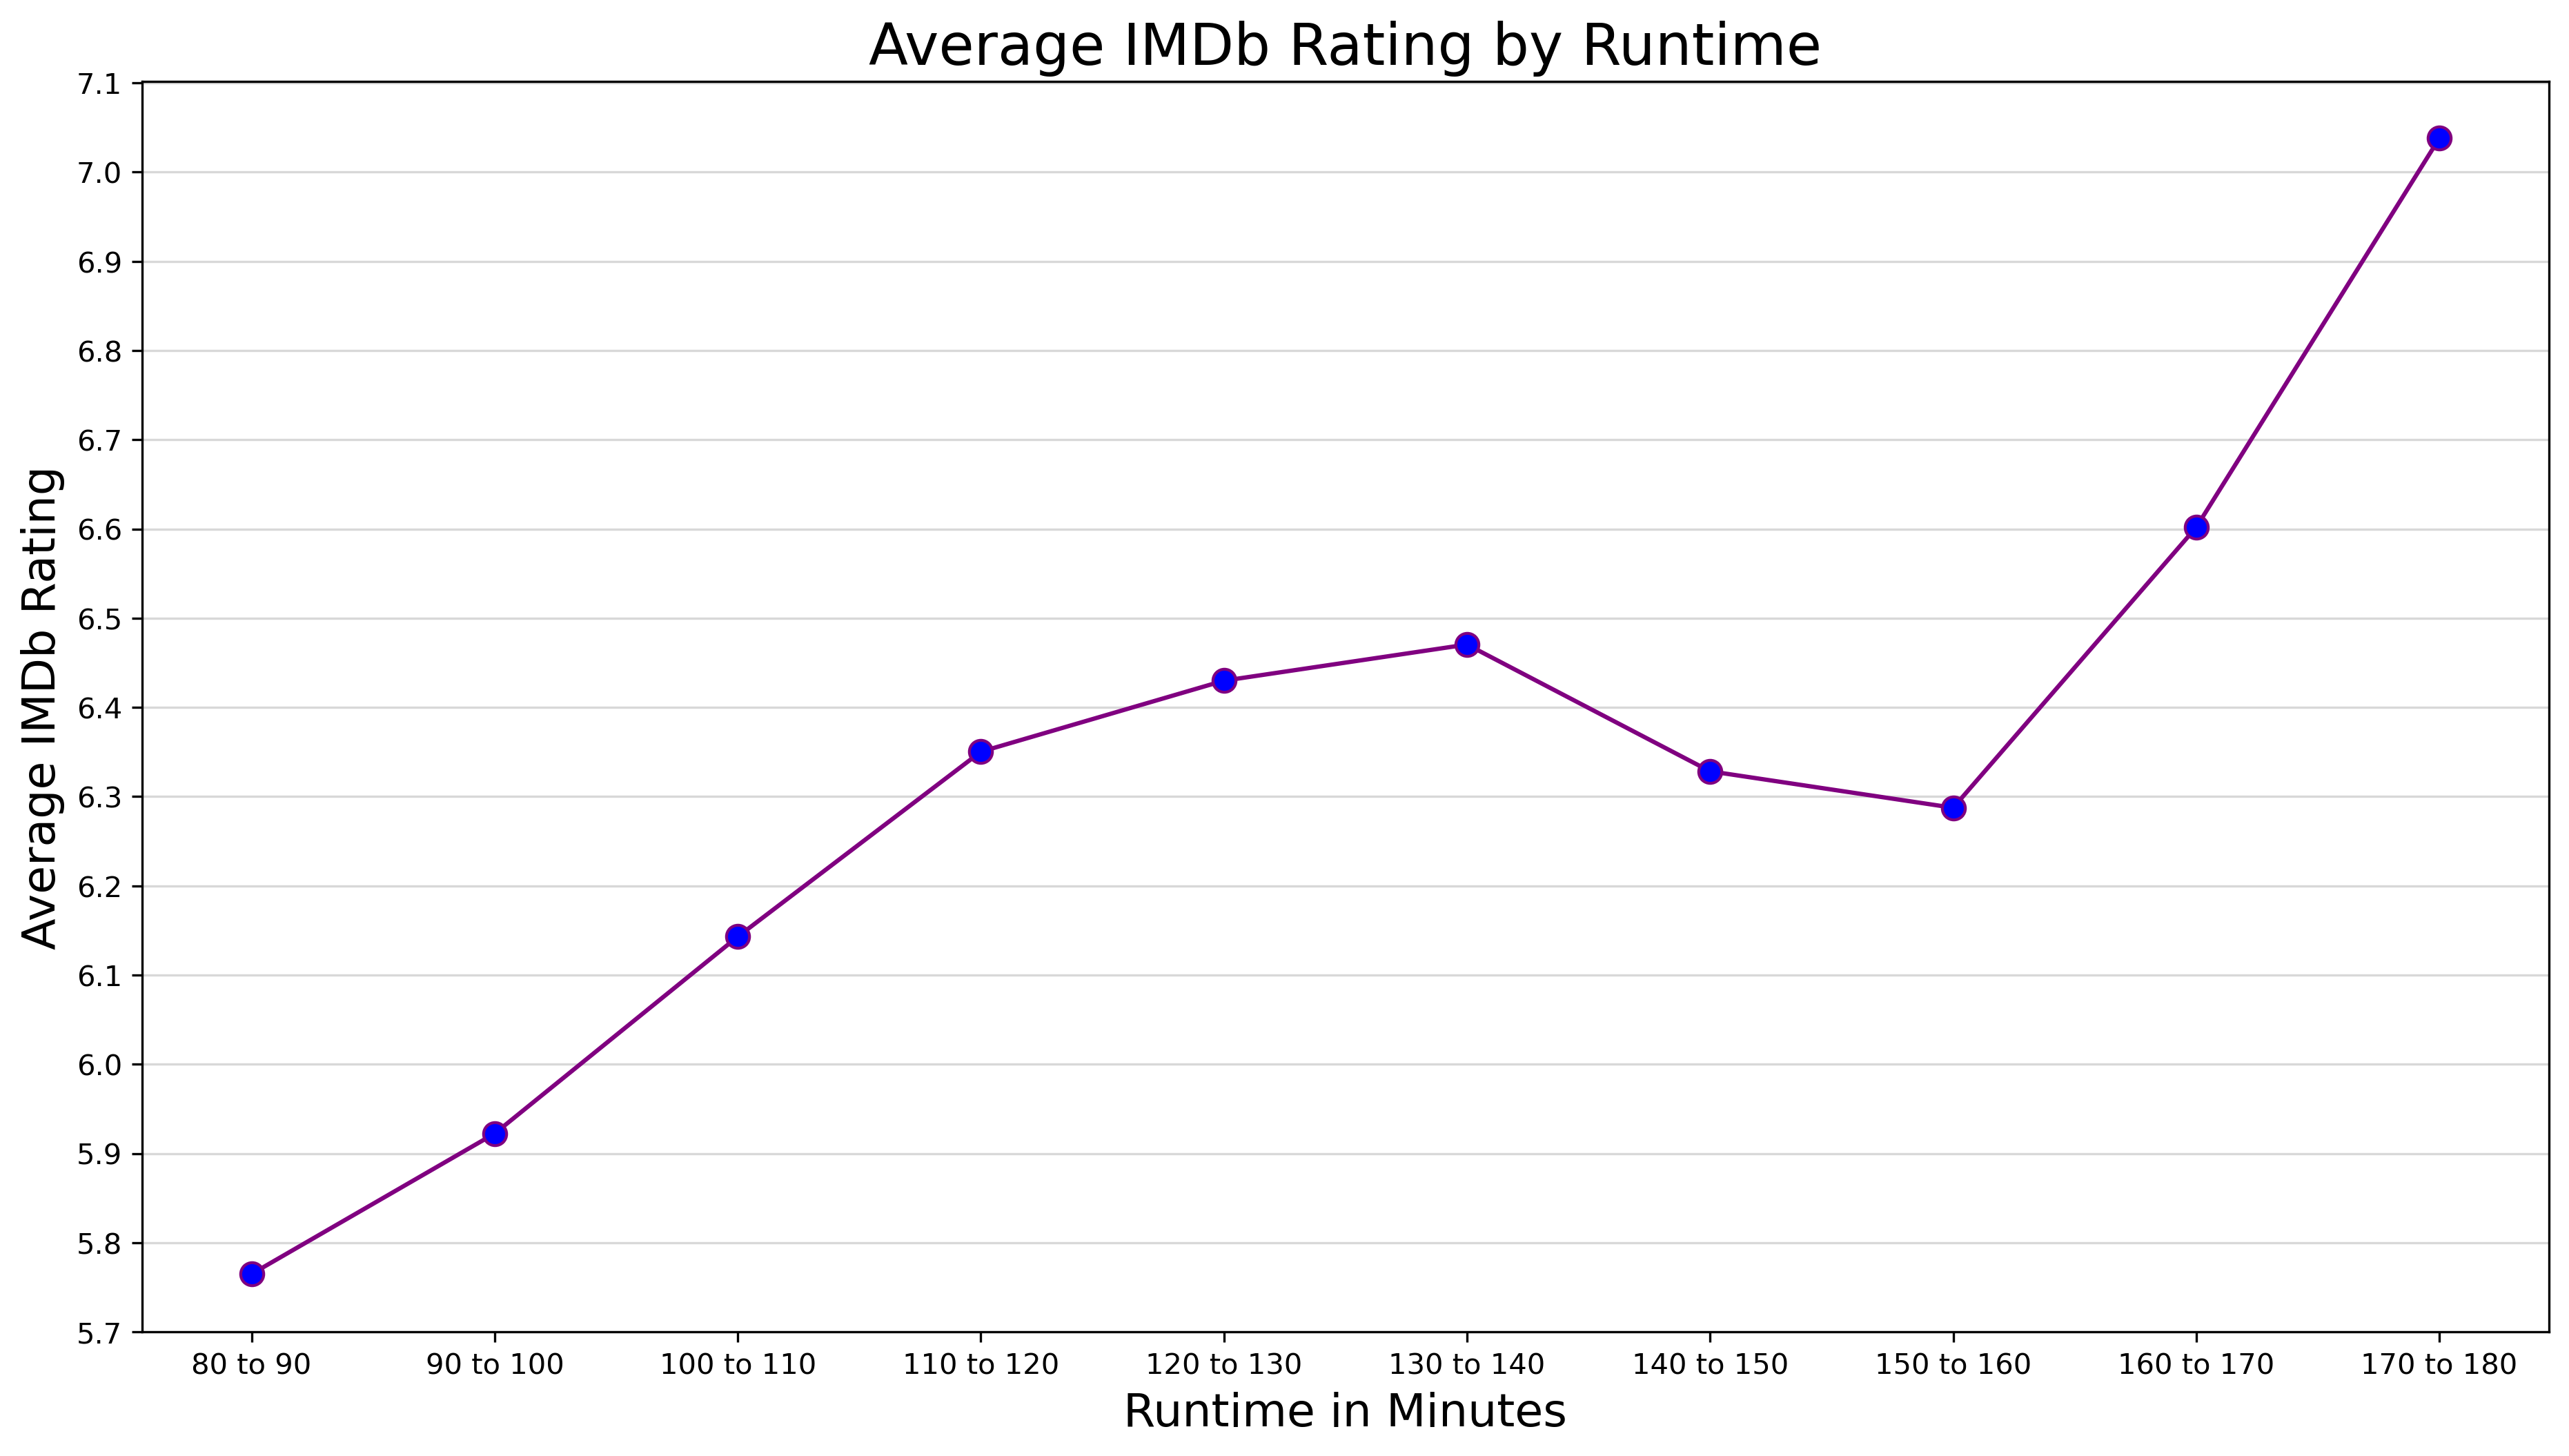

In [38]:
# Plot average IMDb rating by film runtime

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(runtimes, ratings, marker='o', color='purple', markersize=8, markerfacecolor='blue')
ax.set_yticks(np.arange(5.7, 7.2, .1))
ax.grid(True, axis='y', color='gray', alpha=0.3)
ax.set_title('Average IMDb Rating by Runtime', fontsize=20)
ax.set_xlabel('Runtime in Minutes', fontsize=16)
ax.set_ylabel('Average IMDb Rating', fontsize=16);

<br>

# Conclusion and Recommendations

This analysis leads to four recommendations for content creation in Microsoft's new movie studio:
- **If the studio's first short- or medium-term goal is exposure over profits, opt for adventure, action, and comedy films.** These films tend to gross the highest, but as mentioned in the analysis they are not necessarily the most profitable.
- **Take note of whether the film will be primarily targeted to foreign or domestic markets, and adjust film genre accordingly.** Favor the crime genre for films that will solely or primarily be targeted to domestic audiences. For films targeted to foreign audiences, favor the mystery genre. The crime genre ranked two spots higher in domestic box office revenues than in foreign revenues, while the mystery genre ranked two spots higher in foreign box office revenues than in domestic revenues.
- **Give priority to producing highly rated content for films that cater to foreign markets.** Domestic audiences are more forgiving at the box office for lower rated movies than foreign audiences tend to be. In theory one would expect that all content is produced with a high viewer rating in mind, but in practice studios generally know which content is more risky or experimental. Microsoft studios should save the experimental/risky films for domestic markets, in which the films may fare better if they do not garner high ratings.
- **Aim for a runtime range of 130 to 140 minutes for most films.** This is the local maximum of average IMDb rating in the range of films from 80 to 160 minutes (in 10 minute increments). With that said, the studio should also not be afraid to produce extended movies beyond 160 minutes if they are confident in the success of the film. Such situations could involve sequels to hit movies, film adaptations of popular novels, and movies with multiple A-list actors, for example.

<br>

# Next Steps and Remaining Questions

Further analysis could yield additional and/or more accurate insights for content creation:
- **Replace revenues with profits and see if the outcomes differ.** In this analysis we used domestic and foreign box office revenues as a proxy for the generalized "success" of a film. However, this does not control for the expenses outlayed on a film. It may be that adventure films tend to gross the highest, but the additional costs for adventure films outweight the benefit, for example. One could envision horror films faring well profit-wise due to the typically low costs associated with horror films, despite low average revenues.
- **Segment runtimes vs. ratings by genre.** We saw that, among all movies, 130 to 140 minutes tended to yield the highest average rating, along with movies beyond 160 minutes. But it's likely that this is not true for all genres. Some genres may be more conducive to a shorter runtime, while others fare better with longer runtimes. For example, one would expect most consumers to favor documentaries in the range of 60 to 90 minutes vs. 120 minutes plus, while the opposite may be true for adventure movies.
- **Analyze film success by release month, and further segment by genre.** The datasets used in this analysis did not include release month, but other datasets do. Looking at datasets of revenues or profits per release month, segemented by genre, could tell us the release months most conducive to box office success for each genre.
- **Account for effects of inflation.** As the gross revenues dataset did not account for the effects of inflation, more recent films will be more heavily weighted compared to older films. This could skew our results. One solution would be to use a dataset of annual inflation going back to our oldest film, and apply it to each row in our dataframe. Even better would be a dataset on annual box office inflation.
- **Why does average IMDb rating spike after a film runtime surpasses 160 minutes?** One would expect the trendline to continue downward after 160 minutes, but instead we see the opposite. Is this simply an artifact of popular hit movies tending to be longer, or is something else going on in addition here?
- **What is it about adventure and action movies that make them the highest grossing film genres?** Similar to the above, this could simply be an artifact of popular hit movies tending to come in the form of (expensive) adventure and action "epics". But it's possible that there are underlying characteristics of these genres that make them more popular among consumers, that we can then utilize to maximize the chance of success for Microsoft's content.